# Communicate Data Finding Exploration For ` Citi Bike Trip Data System of New York - 2019`
## Gunja Chotai

## Exploration Overview
In this data set exploration, I mainly focused on key feature column of trip duratin,start station, age and user type. I expect that usertype and age will have effects on trip duration. and mainly we can find from dataset that how much aged people like to bike trip and which gender is more interested in bike trip.

## Data Wrangling
Here I selected Citi Bike Trip System Data: https://www.citibikenyc.com/system-data as data source for exploration. Citi Bike Trip System Data provided data of bike trip held in 2019 in the Newyork. The data contains attributes of approximately 4,04,947.

In [19]:
# import packages and setting plots 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import zipfile as zf
import datetime

%matplotlib inline
# import for ignore warnings from output
import warnings
warnings.simplefilter("ignore")

In [20]:
#get data from zip.csv file and comible as one data source

#prepare directory path for get data from zip.csv file 
dir = os.getcwd()
path = dir + '/citybike/'
all_files_lst = os.listdir(path)

# prepare dataset from diffrent csv file into single dataset
file_list = []
print ("featching data from zip file....")
for file in all_files_lst:
    filename = path + file
    df = pd.read_csv(filename)
    file_list.append(df)
df_bike = pd.concat(file_list) 
df =  df_bike.copy()   
df.shape

featching data from zip file....


(404947, 15)

In [21]:
#get sample data from dataset
# change the data type for start and end time to be datetime64[ns]
df.starttime = pd.to_datetime(df.starttime)
df.stoptime = pd.to_datetime(df.stoptime)

#set gender column as 'Male','Female' and 'Others'
df.loc[df['gender'] == 1, 'gender'] = 'Male'
df.loc[df['gender'] == 2, 'gender'] = 'Female'
df.loc[df['gender'] == 0, 'gender'] = 'Unknown'

# convert tripduration second to minute
df.tripduration = pd.to_numeric(df.tripduration/60)

#add age parameter to dataset
df['age'] = (2019 - df['birth year'])

#check data type of start and end time
df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,3.350000,2019-01-01 03:09:09.711,2019-01-01 03:12:30.879,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,29612,Subscriber,1993,Male,26
1,8.416667,2019-01-01 05:18:00.106,2019-01-01 05:26:25.905,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29213,Subscriber,1972,Female,47
2,12.600000,2019-01-01 10:36:33.340,2019-01-01 10:49:10.260,3183,Exchange Place,40.716247,-74.033459,3192,Liberty Light Rail,40.711242,-74.055701,26164,Subscriber,1985,Male,34
3,26.250000,2019-01-01 12:43:38.643,2019-01-01 13:09:54.528,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29672,Customer,1969,Unknown,50
4,26.100000,2019-01-01 12:43:39.601,2019-01-01 13:09:46.510,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,29522,Customer,1969,Unknown,50
5,12.283333,2019-01-01 12:56:53.204,2019-01-01 13:09:11.040,3183,Exchange Place,40.716247,-74.033459,3205,JC Medical Center,40.716540,-74.049638,29447,Subscriber,1993,Male,26
6,15.283333,2019-01-01 13:03:44.776,2019-01-01 13:19:02.769,3183,Exchange Place,40.716247,-74.033459,3277,Communipaw & Berry Lane,40.714358,-74.066611,29299,Subscriber,1986,Male,33
7,54.133333,2019-01-01 13:12:03.128,2019-01-01 14:06:12.040,3183,Exchange Place,40.716247,-74.033459,3196,Riverview Park,40.744319,-74.043991,29495,Subscriber,1992,Male,27
8,52.800000,2019-01-01 13:13:12.045,2019-01-01 14:06:00.411,3183,Exchange Place,40.716247,-74.033459,3196,Riverview Park,40.744319,-74.043991,26312,Customer,1969,Unknown,50
9,5.883333,2019-01-01 17:07:44.667,2019-01-01 17:13:38.264,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,26212,Subscriber,1994,Male,25


### Distribution of maximum trip durations by minute
- From chart We can see from the distribution of data are symmetric, and maximum trip is about to 7 minute. It mostly coved trip from 1 minute to 100 minute.

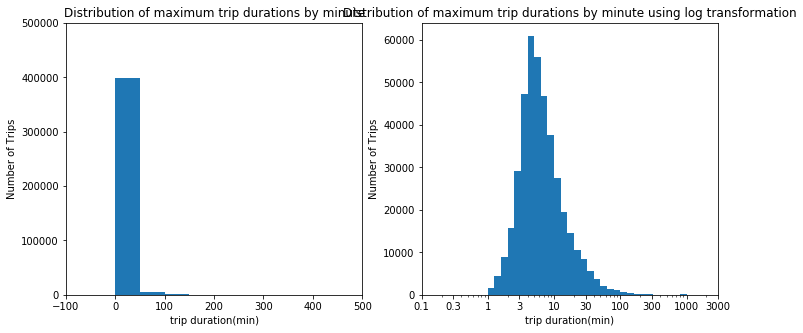

In [22]:
plt.figure(figsize=[ 11.69, 5])
#set bin size
binsize = 50
bins_data = np.arange(0, df['tripduration'].max() + binsize, binsize)

#set data plot figure 
plt.subplot(1, 2, 1)
plt.hist(data = df, x = 'tripduration', bins = bins_data);
plt.title('Distribution of maximum trip durations by minute')
plt.xlabel('trip duration(min)')
plt.ylabel('Number of Trips')
plt.axis([-100, 500, 0, 500000])

#Add log transforation to above chart
#set bin size
bin_edges = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticsk_data =  [0.1 , 0.3 , 1 , 3, 10, 30, 100, 300,1000,3000]
set_labels = ['{}'.format(v) for v in ticsk_data]
#set plot feature
plt.subplot(1, 2, 2)
plt.hist(data = df , x = 'tripduration' , bins = bin_edges);
plt.xlabel('trip duration(min)');
plt.xscale('log');
plt.xticks(ticsk_data,set_labels);
plt.title('Distribution of maximum trip durations by minute using log transformation')
plt.ylabel('Number of Trips')

plt.show()

### Distribution of trip by age
- From chart we can predict that mostly people at the age average 30 to 35 and around 50 year are using this bike trip system in Newyork. And we can say that from 20 to 70 years age people are using this system. So we can predict they provide service above 18 years age people only. 

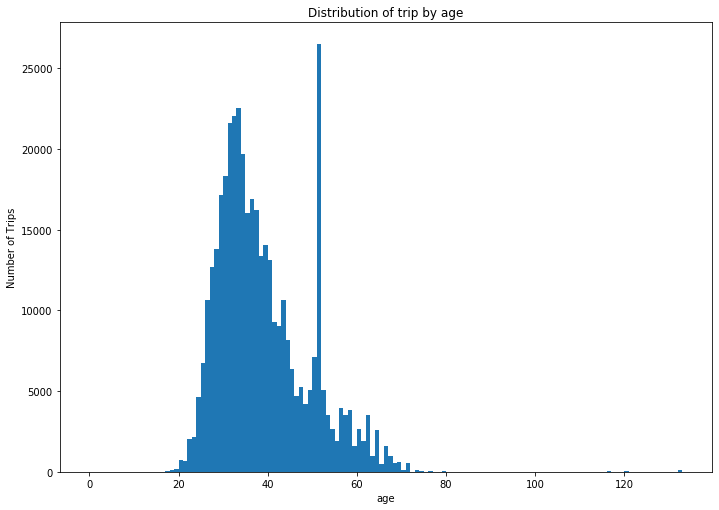

In [25]:
plt.figure(figsize=[ 11.69, 8.27]) # larger figure size for subplots
# histogram on left
bin_edges = np.arange(0, (datetime.datetime.now().year - df['birth year']).max()+1, 1)
sb.distplot(datetime.datetime.now().year - df['birth year'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1});
plt.title('Distribution of trip by age');
plt.xlabel('age')
plt.ylabel('Number of Trips');

### Plot Age wise trip duration (min)
- As we can see from above chart that For 690 minute trip people are using bike at the age of 50 which is good to see that people at this age are ambitious. 
- I must say people at at age of 50 around are more serious about helth and they do excercise using bike.

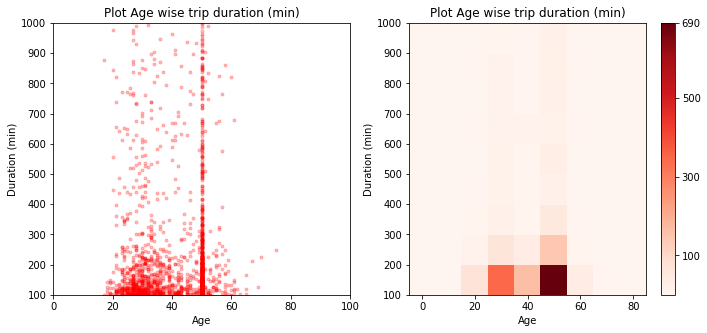

In [26]:
#set scatter plot chart 
plt.figure(figsize=[ 11.69, 5])
plt.subplot(1, 2, 1)
plt.scatter(df['age'], df['tripduration'], alpha = 0.25, marker = '.',color='red' )
plt.axis([0, 100, 100, 1000])
plt.title('Plot Age wise trip duration (min)')
plt.xlabel('Age')
plt.ylabel('Duration (min)')

#set hist2d chart
plt.subplot(1, 2, 2)
bins_y = np.arange(100, 1100, 100)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d((df['age']), df['tripduration'],bins = [bins_x, bins_y],cmap=plt.cm.Reds)
plt.colorbar(ticks=[100,300,500,690]);

plt.title('Plot Age wise trip duration (min)')
plt.xlabel('Age')
plt.ylabel('Duration (min)')
plt.show()

### Get busy start staion name by gender wise total register people
- From chart 'Grove st PATH' start station is very busy station compare to all and 'JCBS Depot' is least register station
- so most of the people like to start their trip near by from 'Grove st PATH' station

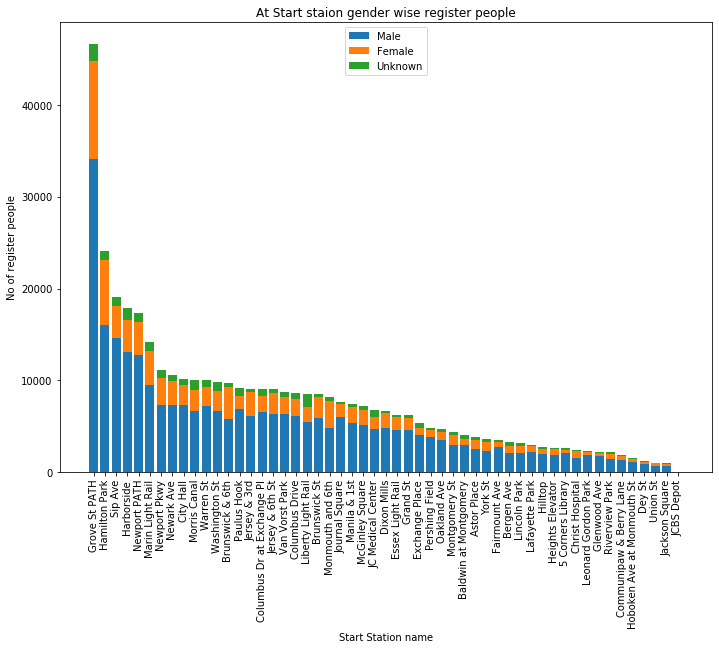

In [28]:
plt.figure(figsize=[ 11.69, 8.27])
plt.xticks(rotation=90)

cat2_order = df['gender'].value_counts().keys()
cat1_order = df['start station name'].value_counts().keys()

baselines = np.zeros(len(cat1_order))
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df[df['gender'] == cat2]['start station name'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines)
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order)


plt.title('At Start staion gender wise register people')
plt.xlabel('Start Station name')
plt.ylabel('No of register people')
plt.show()

### Map trip duration with age by gender
- Here i want to find relation between gender, age and trip duration

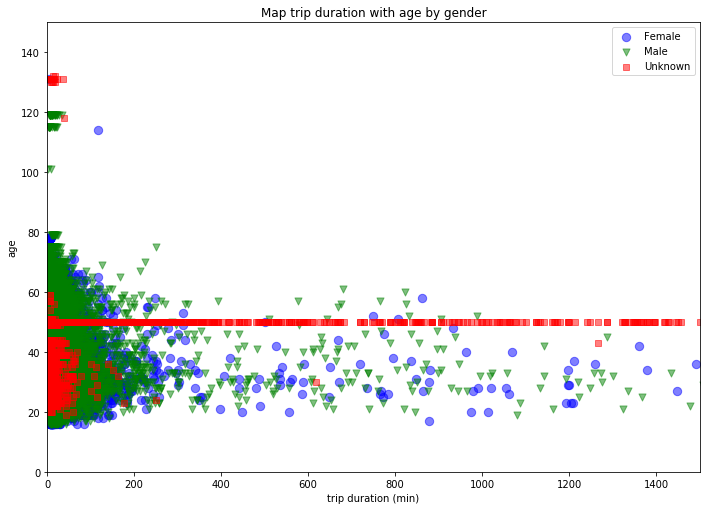

In [30]:
#create chart Map trip duration with age by gender
plt.figure(figsize=[ 11.69, 8.27])
gender_icon = [['Female', 'o','blue',70],
               ['Male', 'v','green',50],
               ['Unknown', 's','Red',30]]

for gender, icon,clr,s in gender_icon:
    df_gender = df[df['gender'] == gender]
    plt.scatter(data = df_gender, x = 'tripduration', y = 'age',marker = icon, alpha= 0.5, c=clr, s=s)
plt.legend(['Female','Male','Unknown'])
plt.axis([0, 1500, 0, 150 ])
plt.title('Map trip duration with age by gender')
plt.xlabel('trip duration (min)')
plt.ylabel('age')
plt.show()

### Discrite above chart gender wise
- From above chart we can't get proper idea about relation so i discrite that chart gender wise.
- now we can say that male and female both are doing bike trip at he age of18 to 80.
- unknown gender are almost doing bike trip at the age of 50.
- most of the female and unknown bike rider are are doing bike trip as customer user type where male has almost same ration for customer and subscriber user type.
- Maximum male trip duration is 300 where mostly female trip duration is 200 to 250 minute.

<Figure size 841.68x595.44 with 0 Axes>

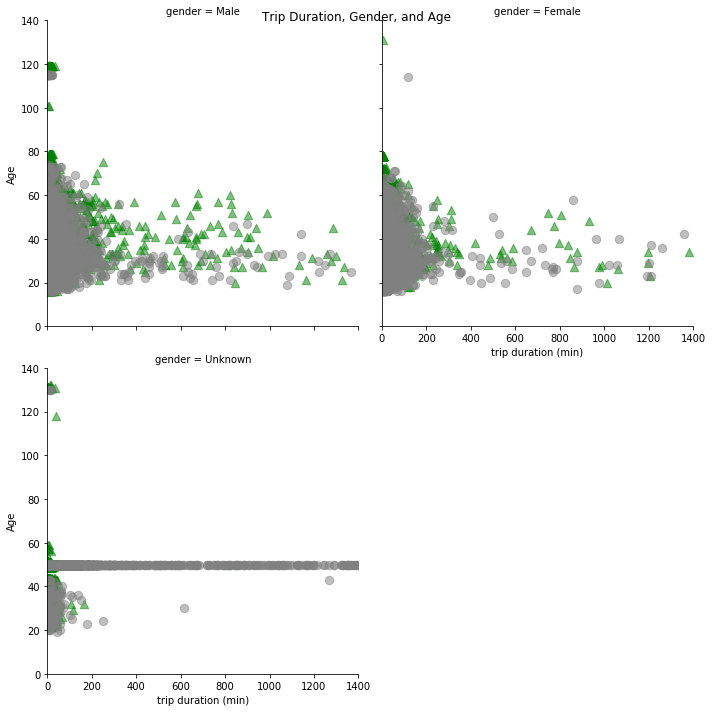

In [31]:
#discrit above chart Map trip duration with age by gender
plt.figure(figsize=[ 11.69, 8.27])
pal = dict(Subscriber="green", Customer="gray")
gender = sb.FacetGrid(data = df, col = 'gender', col_wrap = 2, size = 5, palette=pal,
                 xlim = [0, 1400], ylim = [0, 140], hue="usertype",hue_order=["Subscriber", "Customer"],
                      hue_kws=dict(marker=["^", "o"]))
gender.map(plt.scatter, 'tripduration', 'age', alpha= 0.5,s=70)
gender.set_xlabels('trip duration (min)')
gender.set_ylabels('Age')
gender.fig.suptitle('Trip Duration, Gender, and Age')
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert citybike_slide_deck.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!